<a href="https://colab.research.google.com/github/UERJ-FISICA/Fisica-Moderna/blob/main/Exemplo_Distribui%C3%A7%C3%A3o_Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson

mu = 5.0
[ 0  4  5  3  4  6  7  3  3  5  8  4  7  6  7  5  7  9  5  5  5  4  8  3
  6  6  4  4  7  6  4  2  5  5  4  8  4  2 13  5  6  7  6  2  4  6  6  6
  7  5  2  6  6  6  5  6  5  6  6  8  2  6  3 11  6  8  3  5  4  2  3  4
  8  7  6  5  5  5  4  6  8  6  2  7  4  8  3  2  5  6  3  3  6  4  3  5
  3  2  6  7]
mean = 5.15
sigma = 2.2693611435820435


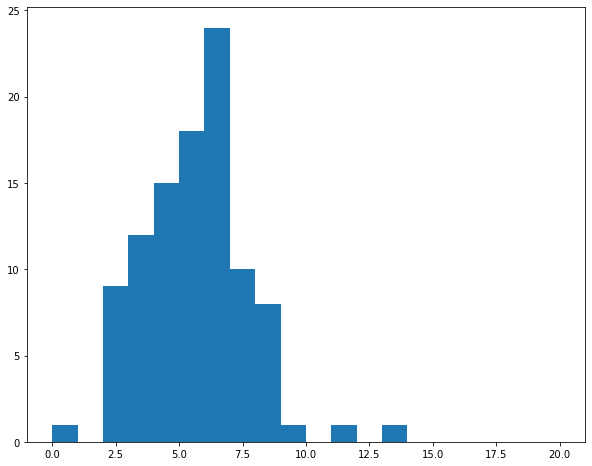

In [2]:
mu = 5.
print ( "mu = {}".format( mu ) )

rv = poisson(mu)
arr_ = rv.rvs( size=100 )
print ( arr_ )
mean_ = arr_.mean()
sigma_ = np.sqrt( arr_.mean() )
print ( "mean = {}".format( mean_ ) )
print ( "sigma = {}".format( sigma_ ) )

fig = plt.figure( figsize=(10,8) )
counts, bins, _ = plt.hist( arr_, bins=20, range=(0,20) )

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5] 20
(0.6112777128359133, 9.688722287164087)
[10.          5.15        2.26936114]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:734: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


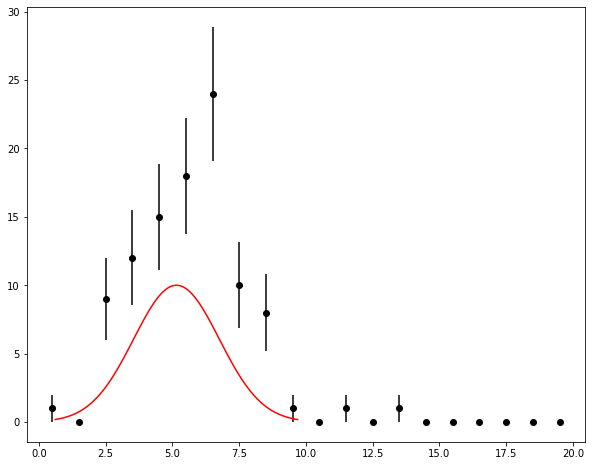

In [3]:
from scipy.optimize import curve_fit

def Gaus( x, A, mu, sigma ):
    return A * np.exp( -( ( x - mu ) / sigma ) ** 2 )

bin_centers = ( bins[:-1] + bins[1:] ) / 2
print ( bin_centers, bin_centers.size )
fit_range = ( mean_ - 2 * sigma_, mean_ + 2 * sigma_)
print ( fit_range )
msk_range = ( ( bin_centers >= fit_range[0] ) & ( bin_centers <= fit_range[1] ) )
popt_gaus, pcov_gaus = curve_fit( Gaus, bin_centers[ msk_range ], counts[ msk_range ], sigma=np.sqrt( counts[ msk_range ] ), p0=( 10., mean_, sigma_ ) )
print ( popt_gaus )
print ( pcov_gaus )

fig = plt.figure( figsize=(10,8) )
plt.errorbar( bin_centers, counts, yerr=np.sqrt( counts ), fmt='ko' )
x_plot = np.linspace(fit_range[0],fit_range[1],100)
plt.plot( x_plot, Gaus( x_plot, *popt_gaus ), '-r' )